In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
knn = KNeighborsClassifier(n_neighbors = 5)

scores = cross_val_score(knn, X, y , cv = 10 ,scoring ='accuracy')
# scoring metric used here is 'accuracy' 
# because it's a classification problem
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [5]:
scores.mean()

0.96666666666666679

### search for an optimal value of K for KNN

In [6]:
k_range = range(1,31)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X , y , scoring = 'accuracy')
    k_scores.append(score.mean())

print k_scores
print len(k_scores)

[0.9673202614379085, 0.95343137254901966, 0.98039215686274517, 0.97344771241830064, 0.98692810457516345, 0.97344771241830064, 0.97344771241830064, 0.97998366013071891, 0.97344771241830064, 0.97344771241830064, 0.97385620915032689, 0.96691176470588236, 0.96037581699346397, 0.96691176470588236, 0.9673202614379085, 0.96037581699346397, 0.96037581699346397, 0.94730392156862742, 0.95383986928104569, 0.94730392156862742, 0.95383986928104569, 0.95383986928104569, 0.95383986928104569, 0.96037581699346397, 0.94730392156862742, 0.96037581699346397, 0.94730392156862742, 0.95383986928104569, 0.95383986928104569, 0.96037581699346397]
30


In [7]:
print type(k_range)

<type 'list'>


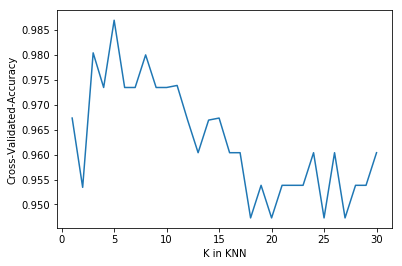

In [8]:
from matplotlib import pyplot as plt
plt.plot(k_range , k_scores)
plt.xlabel('K in KNN')
plt.ylabel('Cross-Validated-Accuracy')
plt.show()

###  More efficient parameter tuning using GridSearchCV

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
k_range = list(range(1,31))
print type(k_range)

<type 'list'>


In [11]:
param_grid = dict(n_neighbors = k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [12]:
grid = GridSearchCV(knn, param_grid , cv =10 ,scoring = 'accuracy')

In [13]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [14]:
grid.cv_results_

{'mean_fit_time': array([  3.99994850e-04,   7.00020790e-04,   6.00028038e-04,
          3.99994850e-04,   3.99994850e-04,   5.99980354e-04,
          4.00018692e-04,   6.99973106e-04,   1.99985504e-04,
          3.00002098e-04,   5.00011444e-04,   3.99994850e-04,
          4.00018692e-04,   7.00044632e-04,   5.00011444e-04,
          1.00016594e-04,   3.99971008e-04,   3.99994850e-04,
          1.99985504e-04,   3.99994850e-04,   5.00011444e-04,
          5.00011444e-04,   2.00009346e-04,   6.00004196e-04,
          3.00002098e-04,   3.99994850e-04,   3.99994850e-04,
          1.00016594e-04,   2.00009346e-04,   9.99927521e-05]),
 'mean_score_time': array([ 0.00170002,  0.00109997,  0.00109999,  0.00130005,  0.00140002,
         0.00109997,  0.00119996,  0.00130002,  0.00150001,  0.00139997,
         0.00109994,  0.00140002,  0.00140002,  0.00129998,  0.00119996,
         0.00159998,  0.00150001,  0.00129998,  0.00150001,  0.00109999,
         0.00120001,  0.00139999,  0.00159998,  0.

In [15]:
print(grid.best_score_)

0.98


In [17]:
grid.best_params_

{'n_neighbors': 13}

In [19]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

### Searching multiple parameters simultaneously

In [21]:
k_range = list(range(1,31))
weight_option = ['uniform' , 'distance']

In [22]:
param_grid = dict(n_neighbors = k_range , weights = weight_option )

In [26]:
grid = GridSearchCV(knn , param_grid , cv =10 , scoring = 'accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [27]:
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


### Using the best parameters to make predictions

In [28]:
knn = KNeighborsClassifier(n_neighbors = 13 , weights = 'uniform')
knn.fit(X,y) ## entire dataset
knn.predict([[3, 5, 4, 2]])

array([1])

### Shortcut (predicting using grid)
<p> 
 GridSearchCV automatically refits the best model using all of the data</p>
<p> that best fitted model is stored in grid object </p>
<p> we can then use prediction using the best fitted model</p>
<p>code in this cell is the same as the top</p>

In [30]:
grid.predict([[3, 5, 4, 2]])

array([1])